In [274]:
pip install pingouin

Note: you may need to restart the kernel to use updated packages.


In [275]:

import pingouin as pg

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings("ignore")

In [276]:
task_one = pd.read_csv('dataset_stat/[SW.BAND] 5_task_1.csv')
task_one

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38
...,...,...,...
29995,22932,C,38
29996,21787,C,25
29997,5054,C,34
29998,10254,C,27


In [277]:
group_a = task_one.query('group == "A"')
group_b = task_one.query('group == "B"')
group_c = task_one.query('group == "C"')

In [278]:
task_one.query('group == "A"').agg({'events':'sum'})

events    295796
dtype: int64

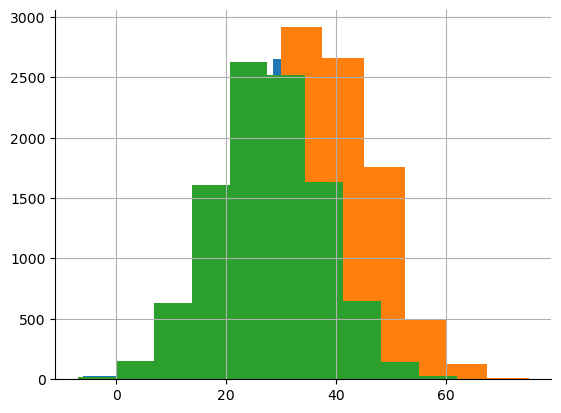

In [279]:
task_one.groupby('group').events.hist()
sns.despine()

In [280]:
# Проведем анализ нормальности дисперсий данных при помощи теста levene и библиотеки pingouin
task_one_t_levene_1 = pg.homoscedasticity(task_one, dv="events", group="group")
task_one_t_levene
# W эта статистика измеряет различия в вариациях между группами. Чем выше значение W, тем больше разница в дисперсии между группами.
# pval - это значение указывает на вероятность получить такое или более экстремальное значение W, если нулевая гипотеза (равенство дисперсий) истинна. 


,W,pval,equal_var
levene,2.26226,0.104133,True


In [281]:
# Проведем анализ нормальности дисперсий данных при помощи теста levene и библиотеки scipy stats
task_one_t_levene_2 = stats.levene(task_one.query('group == "A"').events,
                                   task_one.query('group == "B"').events,
                                   task_one.query('group == "C"').events)
task_one_t_levene_2

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

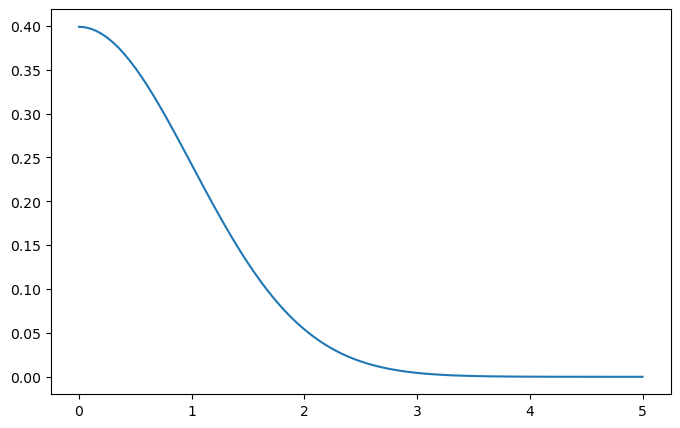

In [282]:
statistic = task_one_t_levene['W'].values[0]
pvalue = task_one_t_levene['pval'].values[0]
dist = stats.levene  # или другое распределение
val = np.linspace(0, 5, 100)  # Задайте диапазон
pdf = stats.norm.pdf(val)  # Пример: распределение нормальное

# Создание графика
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(val, pdf)

In [283]:
#Тест Шапиро-Уилка применяется для каждой группы данных индивидуально
shapiro_A_sample = scipy.stats.shapiro(task_one[task_one['group'] == 'A']['events'].sample(1000, random_state=17))
shapiro_A_sample

ShapiroResult(statistic=0.9973138685756308, pvalue=0.0958664550339529)

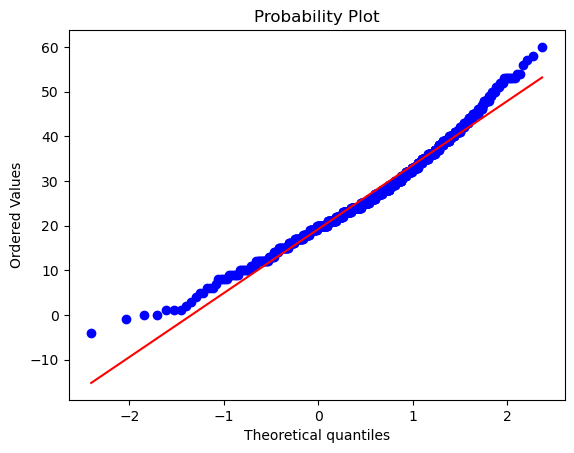

In [284]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = (task_one[task_one['group'] == 'A']['events'].sample(1000, random_state=17))
ax.set_title("QQplot группа A")
res = stats.probplot(x, dist=stats.loggamma, sparams=(2.5,), plot=ax)

In [285]:
shapiro_B_sample = scipy.stats.shapiro(task_one[task_one['group'] == 'B']['events'].sample(1000, random_state=17))
shapiro_B_sample

ShapiroResult(statistic=0.9980819475724109, pvalue=0.3186658905454146)

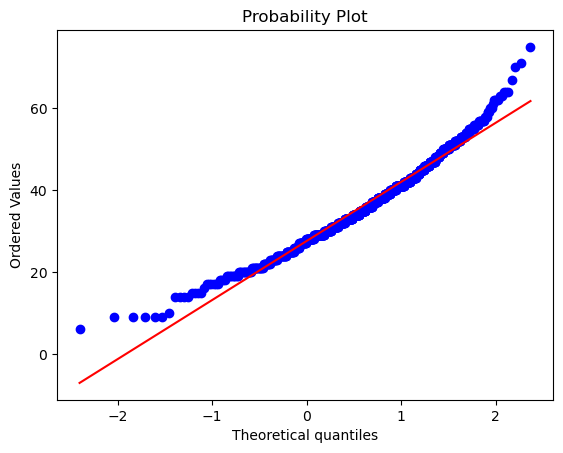

In [286]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = (task_one[task_one['group'] == 'B']['events'].sample(1000, random_state=17))
ax.set_title("QQplot группа B")
res = stats.probplot(x, dist=stats.loggamma, sparams=(2.5,), plot=ax)

In [287]:
shapiro_C_sample = scipy.stats.shapiro(task_one[task_one['group'] == 'C']['events'].sample(1000, random_state=17))
shapiro_C_sample

ShapiroResult(statistic=0.9981201274607922, pvalue=0.3366435414670874)

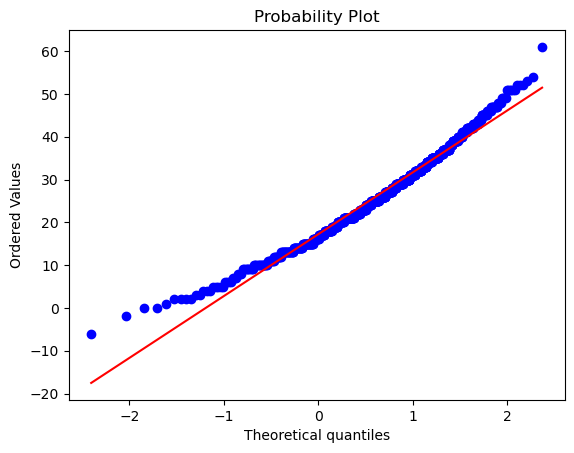

In [288]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = (task_one[task_one['group'] == 'C']['events'].sample(1000, random_state=17))
ax.set_title("QQplot группа C")
res = stats.probplot(x, dist=stats.loggamma, sparams=(2.5,), plot=ax)

In [289]:
shapiro_A_NO_sample = scipy.stats.shapiro(task_one[task_one['group'] == 'A']['events'])
shapiro_A_NO_sample

ShapiroResult(statistic=0.9989209769788764, pvalue=3.3827999572428407e-06)

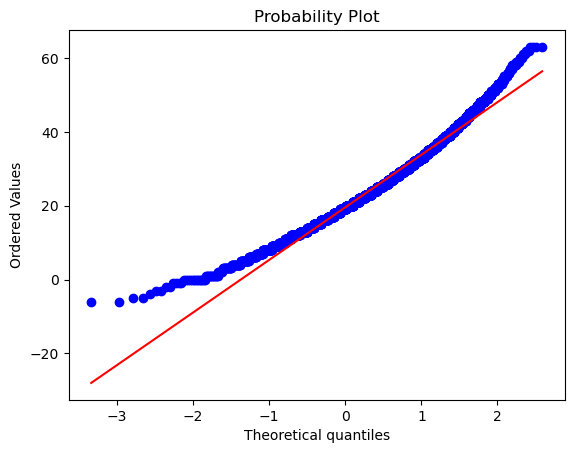

In [290]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = (task_one[task_one['group'] == 'A']['events'])
ax.set_title("QQplot группа A")
res = stats.probplot(x, dist=stats.loggamma, sparams=(2.5,), plot=ax)

In [291]:
shapiro_B_NO_sample = scipy.stats.shapiro(task_one[task_one['group'] == 'B']['events'])
shapiro_B_NO_sample

ShapiroResult(statistic=0.9990152741626567, pvalue=1.0400249208438117e-05)

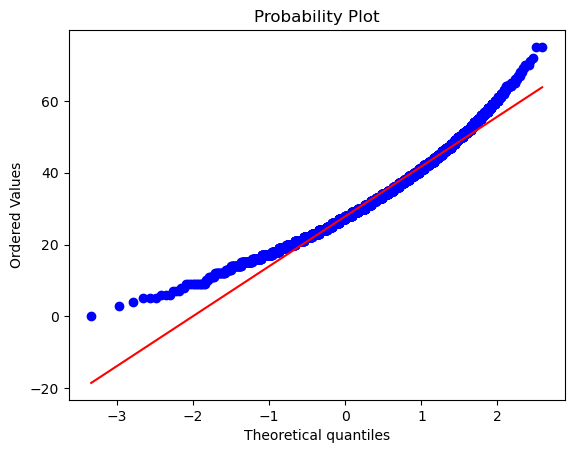

In [292]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = (task_one[task_one['group'] == 'B']['events'])
ax.set_title("QQplot группа B")
res = stats.probplot(x, dist=stats.loggamma, sparams=(2.5,), plot=ax)

In [293]:
shapiro_C_NO_sample = scipy.stats.shapiro(task_one[task_one['group'] == 'C']['events'])
shapiro_C_NO_sample

ShapiroResult(statistic=0.9989340547219037, pvalue=3.942400416472453e-06)

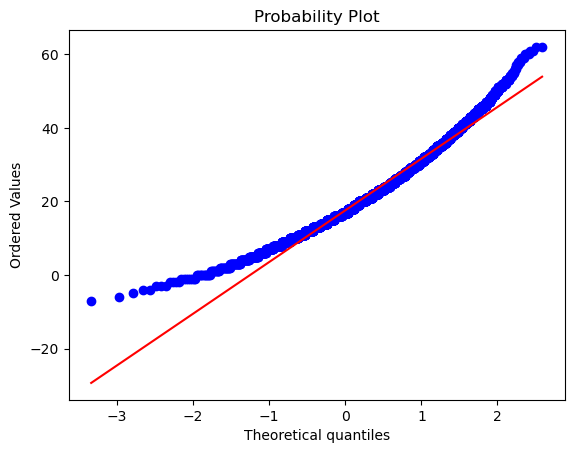

In [294]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = (task_one[task_one['group'] == 'C']['events'])
ax.set_title("QQplot группа C")
res = stats.probplot(x, dist=stats.loggamma, sparams=(2.5,), plot=ax)

In [295]:
normal_test_A = stats.normaltest(task_one[task_one['group'] == 'A']['events'])
normal_test_A

NormaltestResult(statistic=2.1034599402238734, pvalue=0.3493328906085719)

In [296]:
normal_test_B = stats.normaltest(task_one[task_one['group'] == 'B']['events'])
normal_test_B

NormaltestResult(statistic=0.8410715800223014, pvalue=0.6566948749848232)

In [297]:
normal_test_C = stats.normaltest(task_one[task_one['group'] == 'C']['events'])
normal_test_C

NormaltestResult(statistic=3.243725809054571, pvalue=0.19753037588314626)

In [330]:
anova_pg = pg.anova(dv='events', between='group', data=task_one)
anova_pg

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,29997,2886.166657,0.0,0.161377


In [334]:
ANOVA_SciPy = stats.f_oneway(task_one[task_one['group'] == 'A']['events'],
                             task_one[task_one['group'] == 'B']['events'],
                             task_one[task_one['group'] == 'C']['events']) 
ANOVA_SciPy

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

In [342]:
pairwise_tukey = task_one.pairwise_tukey(dv='events', between='group') 
pairwise_tukey

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,A,B,29.5796,37.6136,-8.0340,0.140894,-57.021604,0.0,-0.806229
1,A,C,29.5796,27.4703,2.1093,0.140894,14.970833,0.0,0.210514
2,B,C,37.6136,27.4703,10.1433,0.140894,71.992436,0.0,1.024138


In [344]:
task_one.groupby('group').agg({'events' : 'sum'})

,events
group,
A,295796
B,376136
C,274703
